In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import tree

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['gld_price_data.csv']))

Saving gld_price_data.csv to gld_price_data.csv


In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


<Axes: >

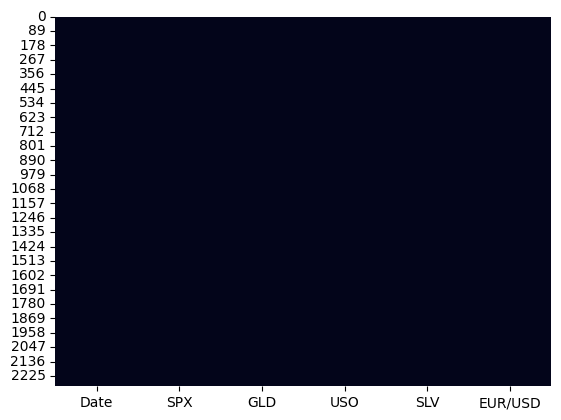

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


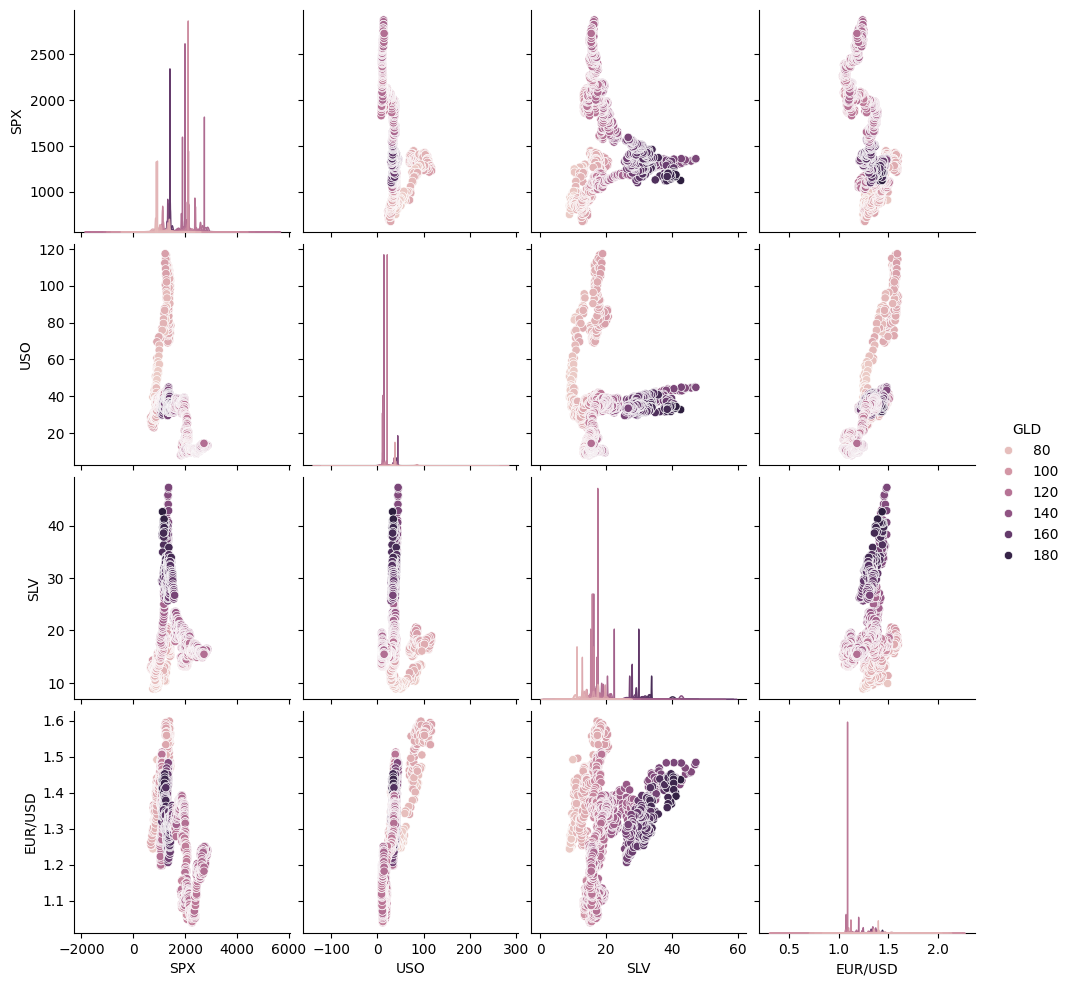

In [ ]:
sns.pairplot(df, hue='GLD')

<Axes: >

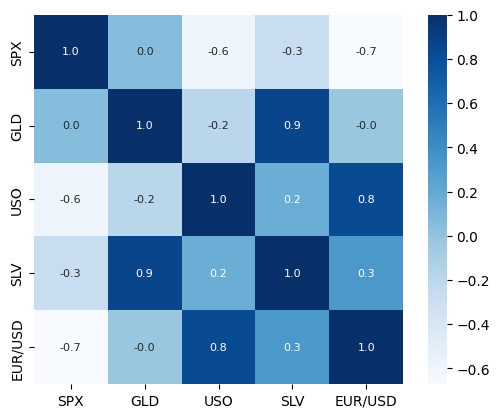

In [ ]:
# Correlation matrix
df_new= df.drop('Date', axis=1)
sns.heatmap(df_new.corr(), cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='Date', ylabel='GLD'>

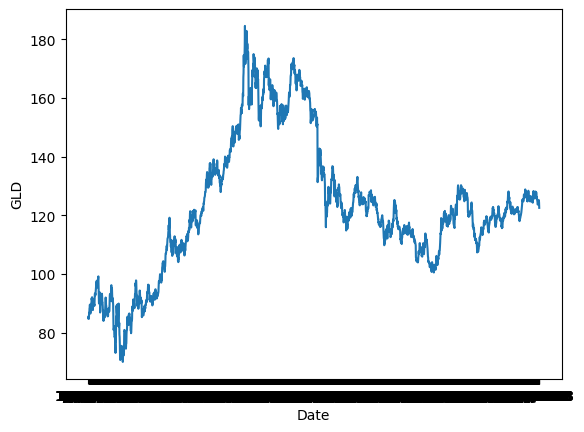

In [ ]:
sns.lineplot(data = df, x='Date', y='GLD')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year']= df['Date'].dt.year

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008


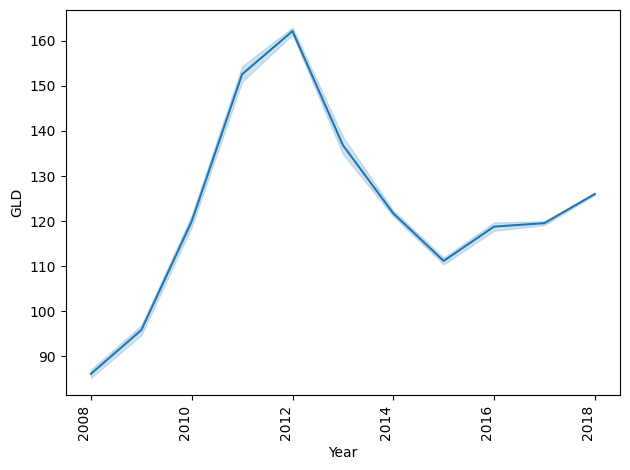

In [ ]:
sns.lineplot(data = df, x='Year', y='GLD')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
gold_mean= df['GLD'].mean()
df['Gold_Price_Category'] = df['GLD'].apply(lambda x: 'High' if x > gold_mean else 'Low')

In [ ]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Gold_Price_Category
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,2008,Low
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,2008,Low
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,2008,Low
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,2008,Low
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,2008,Low
...,...,...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,2018,High
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,2018,High
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,2018,High
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118,2018,High


In [ ]:
df.sample(12)

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Gold_Price_Category
1031,2012-09-17,1461.189941,170.399994,35.750000,32.990002,1.311011,2012,High
1840,2016-04-28,2075.810059,121.290001,11.220000,16.770000,1.135589,2016,Low
1995,2017-01-18,2271.889893,114.870003,11.160000,16.190001,1.069679,2017,Low
1919,2016-09-20,2139.760010,125.440002,10.070000,18.270000,1.115399,2016,High
435,2010-01-06,1137.140015,111.510002,40.970001,17.860001,1.440403,2010,Low
670,2011-01-25,1291.180054,130.100006,36.270000,26.230000,1.364405,2011,High
1846,2016-05-10,2084.389893,120.980003,10.990000,16.280001,1.137436,2016,Low
668,2011-01-21,1283.349976,131.029999,37.509998,26.830000,1.346801,2011,High
1973,2016-12-14,2253.280029,108.830002,11.320000,15.930000,1.062925,2016,Low
2147,2017-10-03,2534.580078,120.830002,10.180000,15.710000,1.174757,2017,Low


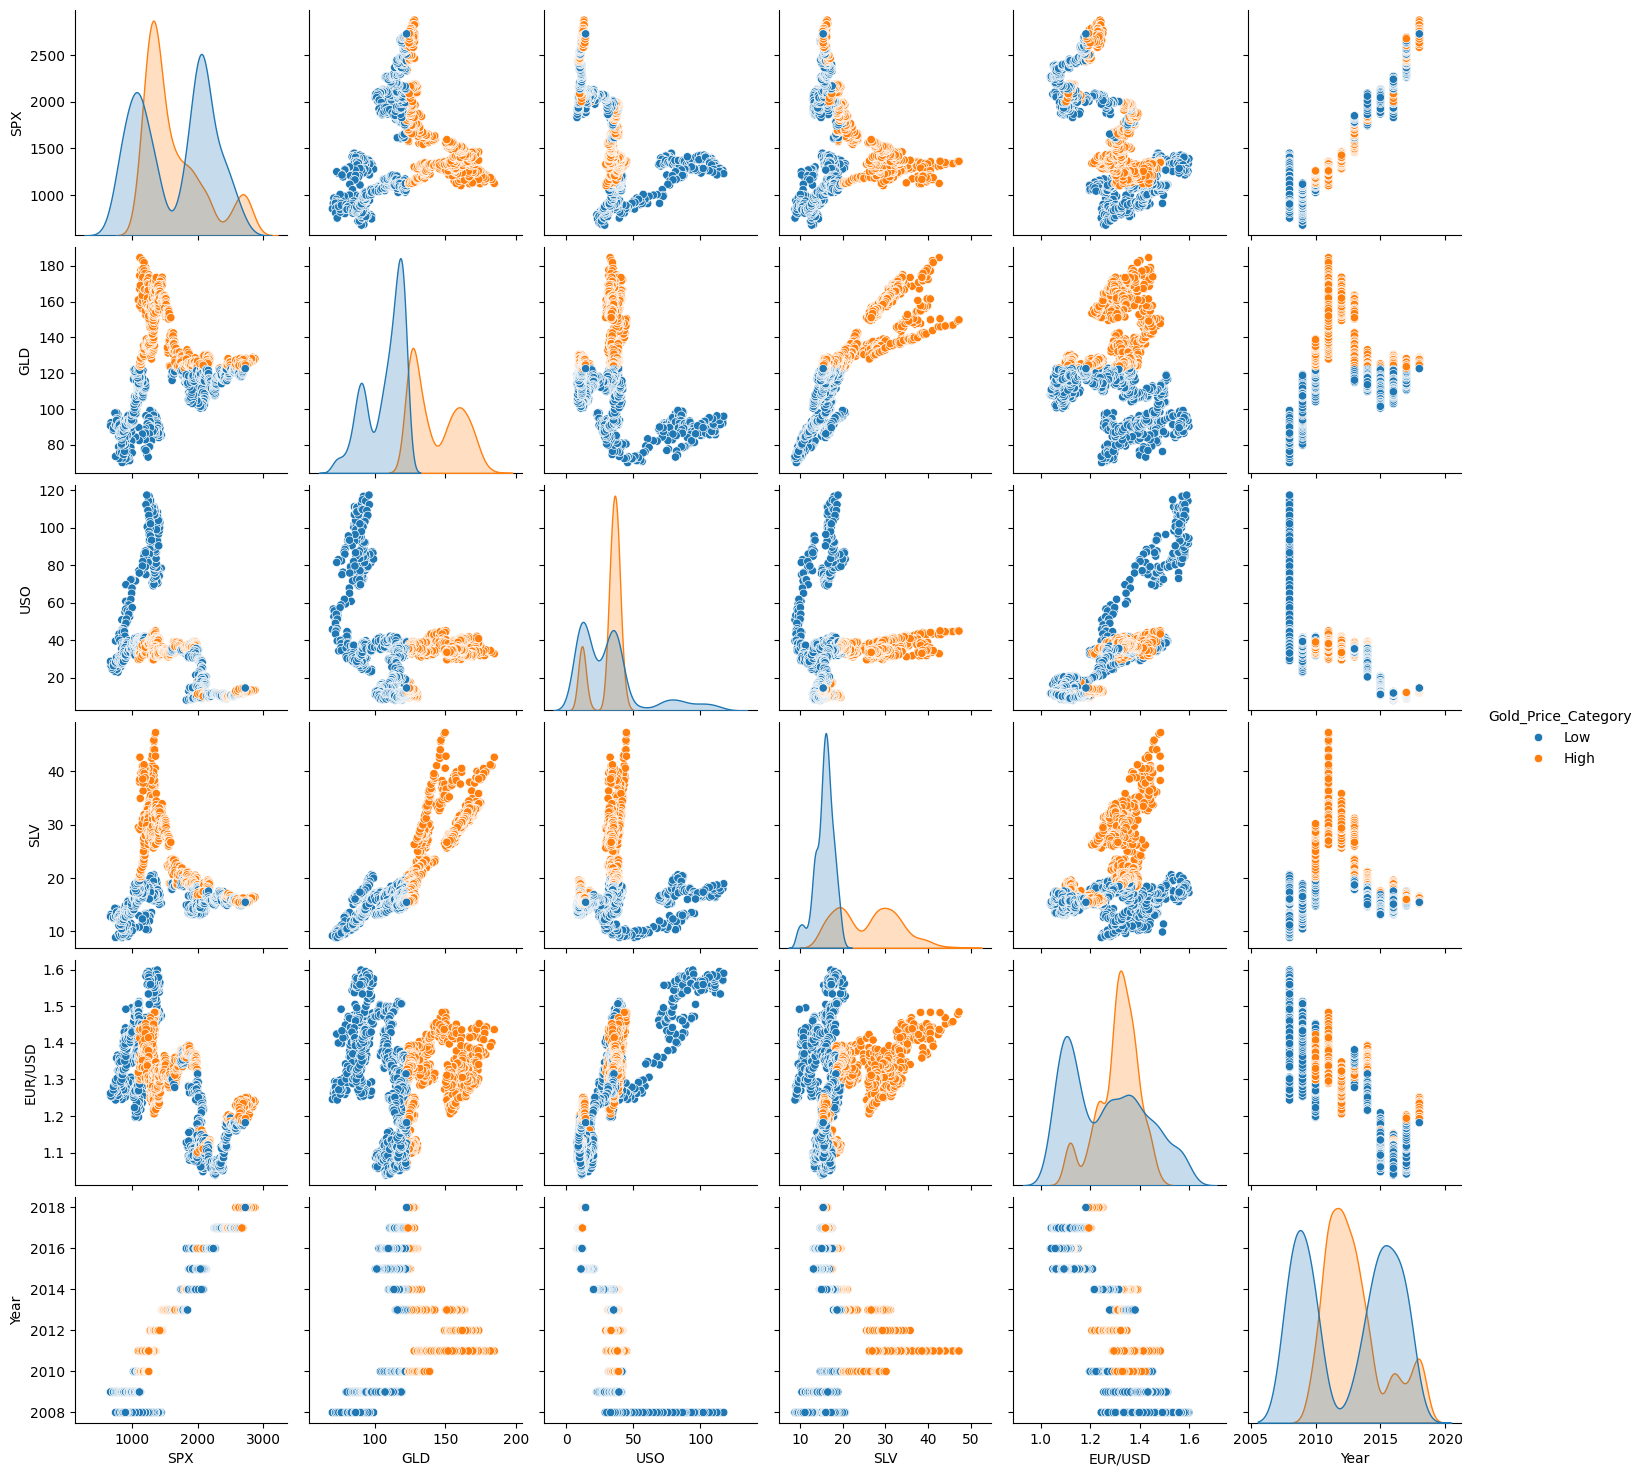

In [ ]:
sns.pairplot(df, hue='Gold_Price_Category')

In [ ]:
X = df.drop(['GLD', 'Gold_Price_Category', 'Date'], axis=1)
y = pd.get_dummies(df['Gold_Price_Category'], drop_first= True)

In [ ]:
X.head()

,SPX,USO,SLV,EUR/USD,Year
0,1447.160034,78.470001,15.180,1.471692,2008
1,1447.160034,78.370003,15.285,1.474491,2008
2,1411.630005,77.309998,15.167,1.475492,2008
3,1416.180054,75.500000,15.053,1.468299,2008
4,1390.189941,76.059998,15.590,1.557099,2008


In [ ]:
y.head()

,Low
0,True
1,True
2,True
3,True
4,True


In [ ]:
y.sample(10)

,Low
1595,True
2005,True
760,False
68,True
872,False
1142,False
501,True
995,False
732,False
2024,True


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns= X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [ ]:
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[297,  23],
       [ 23, 344]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.93      0.93      0.93       320
        True       0.94      0.94      0.94       367

    accuracy                           0.93       687
   macro avg       0.93      0.93      0.93       687
weighted avg       0.93      0.93      0.93       687



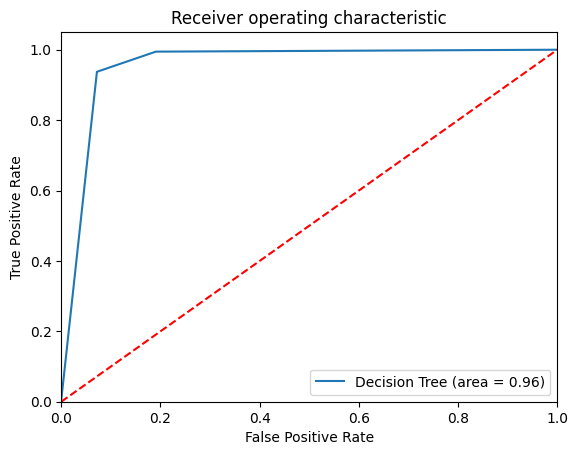

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[262,  58],
       [  9, 358]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      0.82      0.89       320
        True       0.86      0.98      0.91       367

    accuracy                           0.90       687
   macro avg       0.91      0.90      0.90       687
weighted avg       0.91      0.90      0.90       687



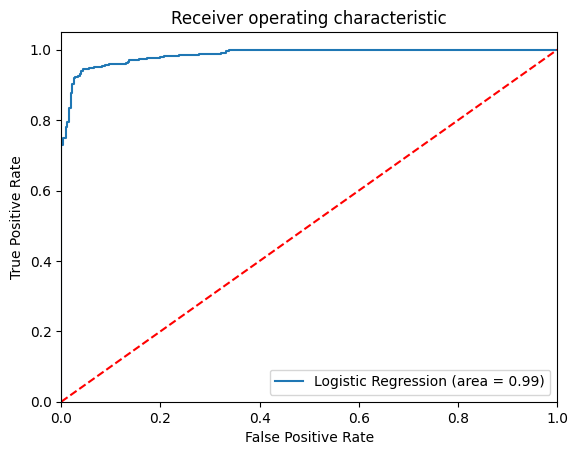

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(X_, columns= X.columns)

In [ ]:
X_rescaled.sample(5)

,SPX,USO,SLV,EUR/USD,Year
1881,0.671981,0.025475,0.274408,0.125858,0.8
1749,0.626360,0.031136,0.119760,0.112100,0.7
1680,0.646708,0.055606,0.139547,0.114401,0.7
1996,0.722639,0.029310,0.189274,0.042396,0.9
1848,0.631769,0.031866,0.191877,0.176236,0.8


In [ ]:
y = df['GLD']

In [ ]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X_rescaled.columns

Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'Year'], dtype='object')

In [ ]:
# Regression functional form
# Price = Intercept + b1*BEDS + b2*BATHS + b3*SqFt + b4*LotSize + b5*MFR + b6*SFR + b7*TownHouse

re_prices.intercept_

78.65175961650601

In [ ]:
re_prices.coef_

array([-48.97592269,   3.20446011, 109.0427598 ,   2.93263855,
        67.70342806])

In [ ]:
train_X.head()

,SPX,USO,SLV,EUR/USD,Year
1233,0.448378,0.276479,0.346264,0.529435,0.5
59,0.290797,0.697681,0.231711,0.959439,0.0
1654,0.637538,0.100164,0.158813,0.124430,0.7
1719,0.643716,0.061450,0.166884,0.115510,0.7
281,0.079018,0.176863,0.078365,0.467224,0.1


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score
import math

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.8981942500616963
MAE:  5.384566709695115
RMSE:  7.350823510799341
Max error:  40.81983867495268


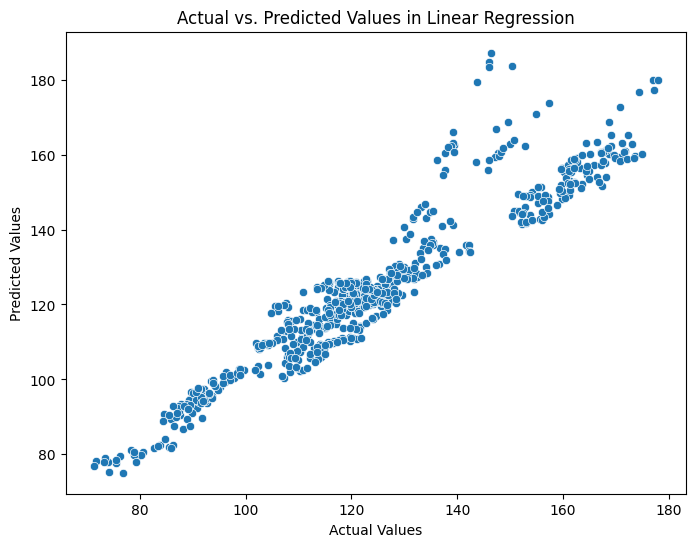

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=valid_y, y=pred_y)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Linear Regression')
plt.show()

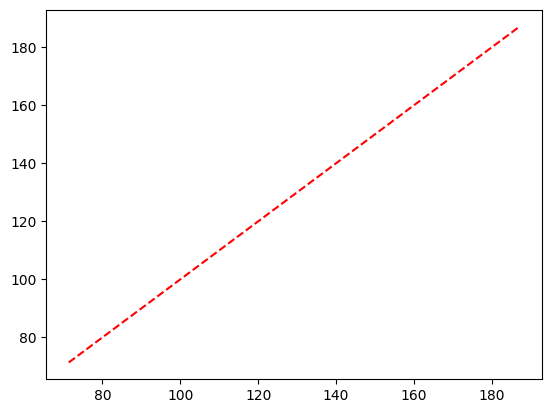

In [ ]:
max_value = max(max(valid_y), max(pred_y))
min_value = min(min(valid_y), min(pred_y))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')

plt.show()

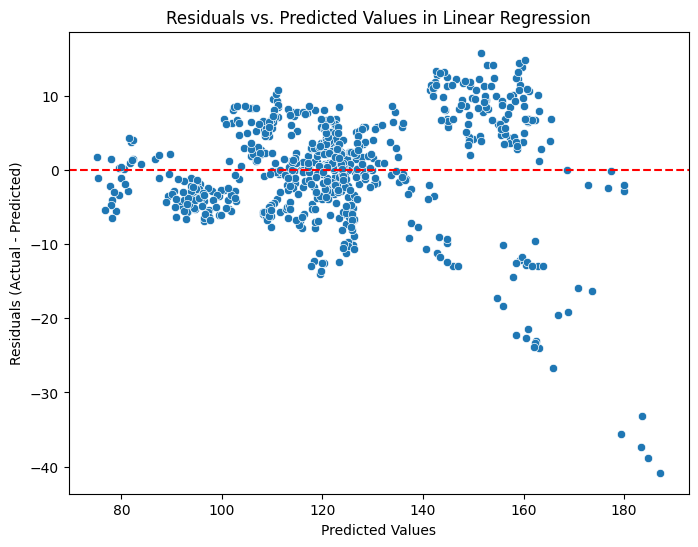

In [ ]:
residuals = valid_y - pred_y

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pred_y, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs. Predicted Values in Linear Regression')
plt.show()

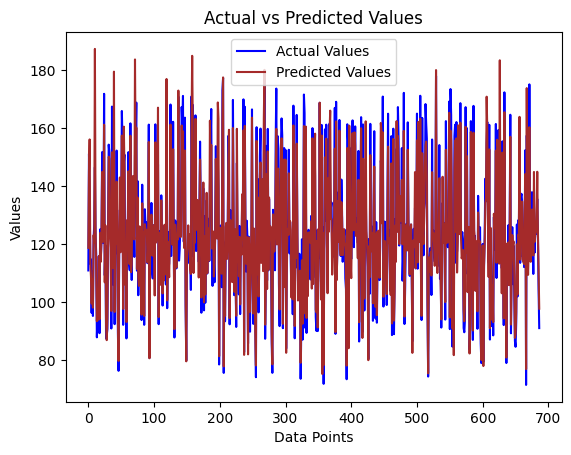

In [ ]:
# Create an array of indices for the data points
indices = range(len(valid_y))

# Plot the actual values as a blue line
plt.plot(indices, valid_y, color='blue', label='Actual Values')

# Plot the predicted values as a red line
plt.plot(indices, pred_y, color='brown', label='Predicted Values')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()  # Show legend

# Show the plot
plt.show()

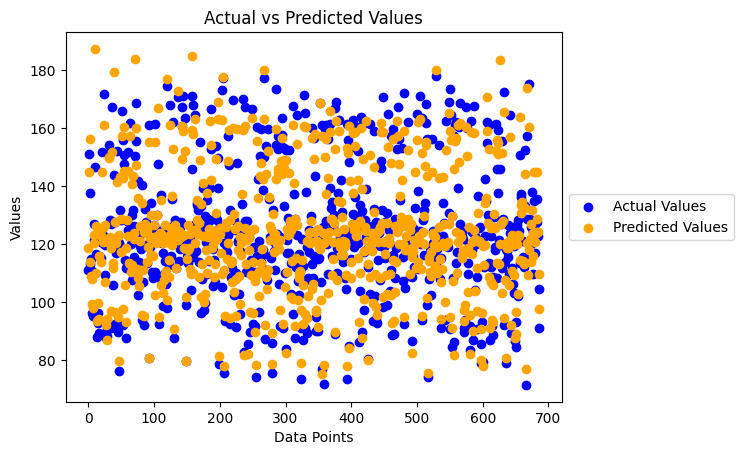

In [ ]:
indices = range(len(valid_y))

# Plot the actual values as blue points
plt.scatter(indices, valid_y, color='blue', label='Actual Values')

# Plot the predicted values as red points
plt.scatter(indices, pred_y, color='orange', label='Predicted Values')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()  # Show legend

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show the plot
plt.show()